In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample

In [2]:
plt.rcParams['figure.figsize'] = [12, 6] #Make the graph big

In [3]:
# Generate time vector
duration = 1  # seconds
sampling_rate = 1000  # Hz
time_div = np.arange(0, duration, 1/sampling_rate) # x timeline
amplitude = 1

## Add A Minor Chord Plus 10 Hz Noise

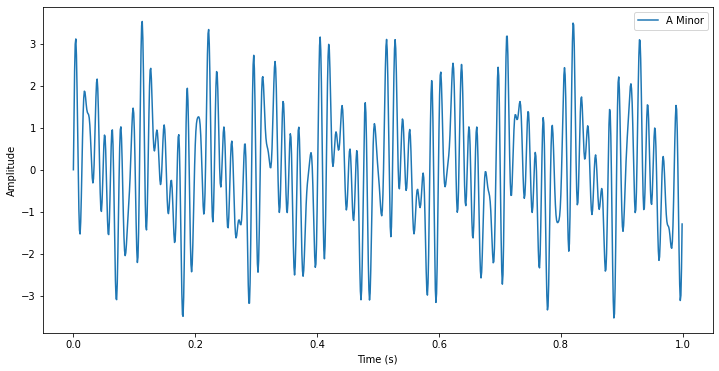

In [4]:
# A Minor = A (55 Hz) + C (65 Hz) + E(82 Hz)
# Generate sine waves
a_freq = 55
c_freq = 65
e_freq = 82
noise_freq = 10

a_wave = amplitude * np.sin(2 * np.pi * a_freq * time_div)
c_wave = amplitude * np.sin(2 * np.pi * c_freq * time_div)
e_wave = amplitude * np.sin(2 * np.pi * e_freq * time_div)
noise_wave = amplitude * np.sin(2 * np.pi * noise_freq * time_div)

a_minor_wave = a_wave + c_wave + e_wave + noise_wave

# Plot
plt.plot(time_div, a_minor_wave, label='A Minor')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

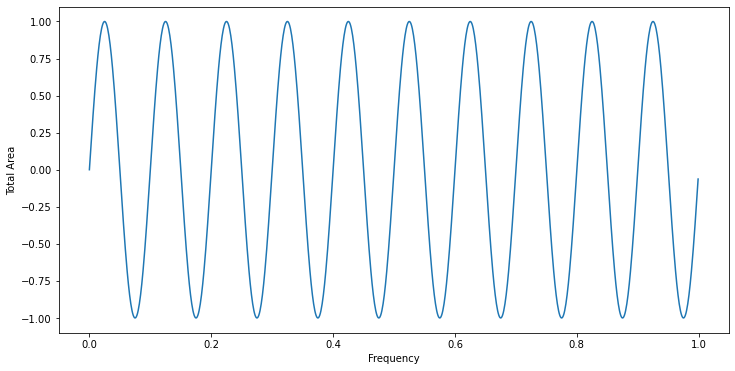

In [5]:
plt.plot(time_div, noise_wave,)
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.show()

## Calculate Area Under Curve

In [6]:
f = 0  # Start sweeping at 0 Hz
nyquist_sampling_rate = sampling_rate * 2
a_minor_resampled = resample(a_minor_wave, nyquist_sampling_rate)
time_div_resampled = np.arange(0, 1, 1/nyquist_sampling_rate)

nyquist_freq = np.arange(0, len(a_minor_resampled), len(a_minor_resampled)/(nyquist_sampling_rate))
area_overview = np.zeros(len(nyquist_freq))

while f < len(area_overview):
    sin_wave = amplitude * np.sin(2 * np.pi * f * time_div_resampled)
    cos_wave = amplitude * np.cos(2 * np.pi * f * time_div_resampled)
    wave_multiplied = (sin_wave + cos_wave) * a_minor_resampled
    
    above_x_axis = sin_wave > 0
    below_x_axis = sin_wave < 0
    area_above_x_axis = np.trapz(wave_multiplied[above_x_axis], time_div_resampled[above_x_axis])
    area_under_x_axis = np.trapz(wave_multiplied[below_x_axis], time_div_resampled[below_x_axis])
    area_combined = area_above_x_axis + area_under_x_axis
    
    area_overview[f] = area_combined
    
    # Examine next frequency
    f = f + 1

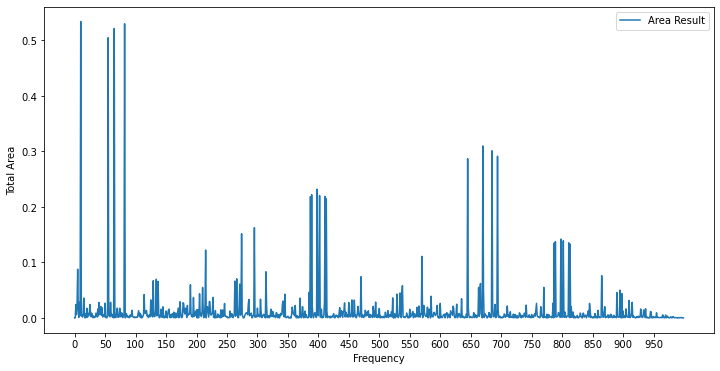

In [7]:
# Plot Nyquist
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    abs(area_overview[0 : len(area_overview) // 2]),
    label='Area Result'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()

## Fourier Transform

In [8]:
f = 0  # Start sweeping at 0 Hz
nyquist_sampling_rate = sampling_rate * 2
a_minor_resampled = resample(a_minor_wave, nyquist_sampling_rate)
time_div_resampled = np.arange(0, 1, 1/nyquist_sampling_rate)

nyquist_freq = np.arange(0, len(a_minor_resampled), len(a_minor_resampled)/(nyquist_sampling_rate))
magnitude_overview = np.zeros(len(nyquist_freq))

while f < len(area_overview):
    sin_wave = amplitude * np.sin(2 * np.pi * f * time_div_resampled)
    cos_wave = amplitude * np.cos(2 * np.pi * f * time_div_resampled)
    wave_multiplied = np.sum((sin_wave + cos_wave) * a_minor_resampled)
    
    magnitude_overview[f] = wave_multiplied
    
    # Examine next frequency
    f = f + 1

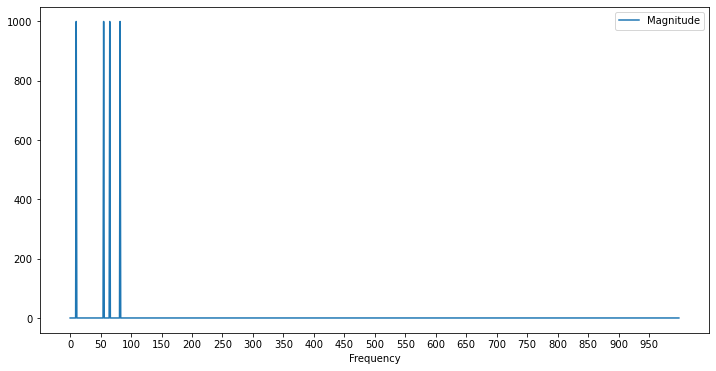

In [9]:
# Plot Nyquist
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    abs(magnitude_overview[0 : len(magnitude_overview) // 2]),
    label='Magnitude'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.legend()
plt.show()

## Verify Using Euler's Number

In [10]:
euler_f = 0
magnitude_overview = np.zeros(len(nyquist_freq), dtype = complex)

sine_wave_template = np.arange(len(nyquist_freq))
while euler_f < len(magnitude_overview):
    euler_wave = np.sum(a_minor_resampled * np.exp(-2j * np.pi * sine_wave_template * time_div_resampled[euler_f]))
    magnitude_overview[euler_f] = euler_wave
    
    # Examine next frequency
    euler_f = euler_f + 1

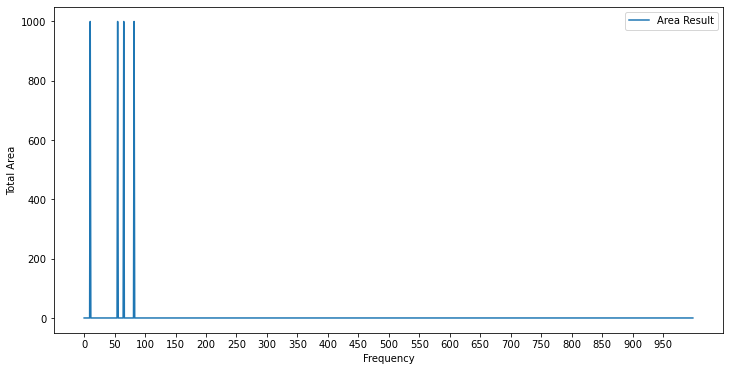

In [11]:
# Plot Nyquist
plt.plot(
    nyquist_freq[0 : len(nyquist_freq) // 2],
    abs(magnitude_overview[0 : len(magnitude_overview) // 2]),
    label='Area Result'
)
plt.xticks(np.arange(0, len(nyquist_freq) // 2, 50))
plt.xlabel('Frequency')
plt.ylabel('Total Area')
plt.legend()
plt.show()